#Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [5]:
searches = pd.read_csv("searches.tsv",sep = "\t")
contacts = pd.read_csv("contacts.tsv",sep = "\t")

In [6]:
searches.describe()

,n_searches,n_nights,n_guests_min,n_guests_max,filter_price_min,filter_price_max
count,35737.000000,23888.000000,35737.000000,35737.000000,13322.000000,1.332200e+04
mean,9.206565,7.672765,1.742955,2.105857,8.470200,9.019063e+07
std,17.348746,21.557614,1.460440,1.817358,53.987679,2.978482e+08
min,1.000000,0.000000,1.000000,1.000000,0.000000,9.000000e+00
25%,1.000000,2.000000,1.000000,1.000000,0.000000,8.600000e+01
50%,4.000000,3.000000,1.000000,2.000000,0.000000,1.390000e+02
75%,10.000000,5.000000,2.000000,2.000000,0.000000,3.010000e+02
max,448.000000,399.000000,16.000000,16.000000,1250.000000,1.073742e+09


In [12]:
searches.isna().sum()/len(searches)

ds                      0.000000
id_user                 0.000000
ds_checkin              0.331561
ds_checkout             0.331561
n_searches              0.000000
n_nights                0.331561
n_guests_min            0.000000
n_guests_max            0.000000
origin_country          0.000000
filter_price_min        0.627221
filter_price_max        0.627221
filter_room_types       0.546940
filter_neighborhoods    0.962336
dtype: float64

In [13]:
contacts.isna().sum()/len(contacts)

id_guest          0.000000
id_host           0.000000
id_listing        0.000000
ts_contact_at     0.000000
ts_reply_at       0.077208
ts_accepted_at    0.536367
ts_booking_at     0.722101
ds_checkin        0.000000
ds_checkout       0.000000
n_guests          0.000000
n_messages        0.000000
dtype: float64

The filter_neighborhoods has 96% of missing values, This is too large, So we will drop the column

In [23]:
searches = searches.drop(columns=['filter_neighborhoods'])
searches

,ds,id_user,ds_checkin,ds_checkout,n_searches,n_nights,n_guests_min,n_guests_max,origin_country,filter_price_min,filter_price_max,filter_room_types
0,2014-10-01,0000af0a-6f26-4233-9832-27efbfb36148,2014-10-09,2014-10-12,16,3.0,2,2,IE,0.0,6.700000e+01,",Entire home/apt,Entire home/apt,Private room,..."
1,2014-10-01,0000af0a-6f26-4233-9832-27efbfb36148,2014-10-09,2014-10-19,3,10.0,1,2,IE,0.0,6.700000e+01,NaN
2,2014-10-01,000cd9d3-e05b-4016-9e09-34a6f8ba2fc5,NaN,NaN,1,NaN,1,1,GB,NaN,NaN,NaN
3,2014-10-01,000cd9d3-e05b-4016-9e09-34a6f8ba2fc5,2014-11-08,2014-11-10,11,2.0,1,2,GB,NaN,NaN,",Entire home/apt"
4,2014-10-01,001c04f0-5a94-4ee0-bf5d-3591265256de,NaN,NaN,1,NaN,1,1,IE,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
35732,2014-10-14,ff3c92ed-ebea-4691-a808-cc6fb73f2f55,NaN,NaN,3,NaN,2,2,US,0.0,1.000000e+02,Entire home/apt
35733,2014-10-14,ff61875b-1d27-4ee4-bd4e-36671d3bfed4,NaN,NaN,2,NaN,1,1,US,NaN,NaN,NaN
35734,2014-10-14,ff946a14-777b-4597-91b2-3277921214cd,2014-11-03,2014-11-06,10,3.0,1,3,IL,NaN,NaN,Entire home/apt
35735,2014-10-14,ffc681d4-3668-4448-af38-6f73bc9fb89d,NaN,NaN,5,NaN,1,1,IE,0.0,4.850000e+02,NaN


In [24]:
searches['ds'] = pd.to_datetime(searches['ds'])
searches['ds_checkin'] = pd.to_datetime(searches['ds_checkin'])
searches['ds_checkout'] = pd.to_datetime(searches['ds_checkout'])
searches['length_preperation'] = searches['ds_checkin'] - searches['ds']

In [25]:
display(searches.describe())


,n_searches,n_nights,n_guests_min,n_guests_max,filter_price_min,filter_price_max,length_preperation
count,35737.000000,23888.000000,35737.000000,35737.000000,13322.000000,1.332200e+04,23888
mean,9.206565,7.672765,1.742955,2.105857,8.470200,9.019063e+07,51 days 08:11:53.730743469
std,17.348746,21.557614,1.460440,1.817358,53.987679,2.978482e+08,65 days 18:56:19.491940518
min,1.000000,0.000000,1.000000,1.000000,0.000000,9.000000e+00,-1 days +00:00:00
25%,1.000000,2.000000,1.000000,1.000000,0.000000,8.600000e+01,10 days 00:00:00
50%,4.000000,3.000000,1.000000,2.000000,0.000000,1.390000e+02,26 days 00:00:00
75%,10.000000,5.000000,2.000000,2.000000,0.000000,3.010000e+02,67 days 00:00:00
max,448.000000,399.000000,16.000000,16.000000,1250.000000,1.073742e+09,604 days 00:00:00


This shows that the number of guests is usually 1 or 2. This can be understood since even at 75% the n_guests_min and n_guests_max are 2 and at 25% is 1. Leads to believe that smaller accommodations are preferred.

In [26]:
#skewness in searches dataset
display(searches.skew(axis = 0, numeric_only = True, skipna = True))

n_searches           7.509258
n_nights             9.942364
n_guests_min         3.583798
n_guests_max         3.148548
filter_price_min    11.087745
filter_price_max     2.999833
dtype: float64

All numeric columns have a Fisher-Pearson coefficient value greater than 1, So the Data is positively skewed.


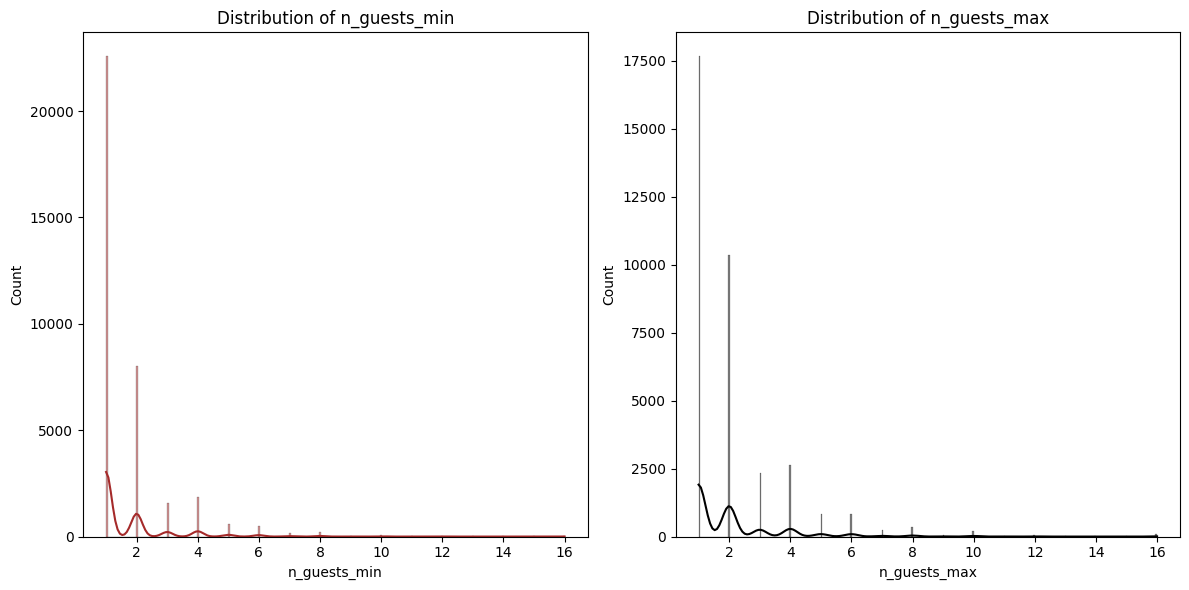

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(searches['n_guests_min'], color='brown', kde=True, ax=axes[0])
axes[0].set_title('Distribution of n_guests_min')

# Plot the distribution of 'n_guests_max' in the second subplot
sns.histplot(searches['n_guests_max'], color='black', kde=True, ax=axes[1])
axes[1].set_title('Distribution of n_guests_max')

plt.tight_layout()
plt.show()


Both have similar distributions with 1 being the most popular option and 2 being the next popular option


KDE stands for Kernel Density Estimation. It is a non-parametric way to estimate the probability density function (PDF) of a random variable. In simpler terms, KDE is a method for smoothing and visualizing a probability distribution from a set of data points.

Here's a brief explanation of how KDE works:

Data Points: Start with a set of data points. Each data point represents an observation or measurement of a random variable.

Kernel Function: A kernel function is selected. The kernel function is a smooth, symmetric, and positive function that is centered at each data point.

Kernel Placement: Place a kernel function at each data point.

Summation: Sum up all the individual kernel functions. The resulting smooth curve represents an estimate of the probability density function.

Normalization: The final KDE is often normalized to ensure that the area under the curve equals 1, making it a valid probability density function.

[[None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None]]

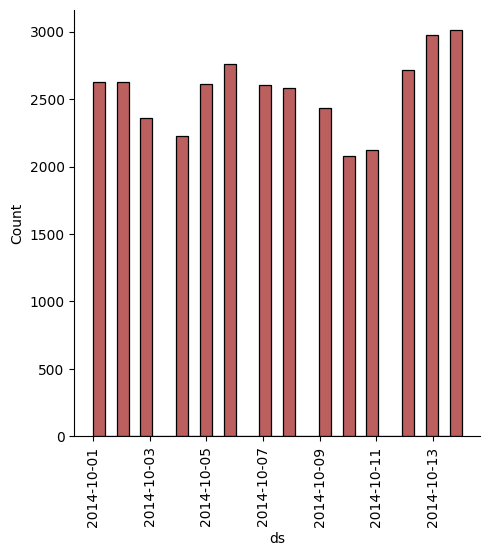

In [29]:
#when were the plots conducted?

ax = sns.displot(searches, x = 'ds', color = 'brown')
# adjusts the rotation of the x-axis tick labels:
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in ax.axes.flat]

#ax.get_xticklabels(): This gets the x-axis tick labels for each subplot in the FacetGrid.
#plt.setp(...): This is a Matplotlib function to set properties of an object.
#rotation=90: This sets the rotation angle of the tick labels to 90 degrees, making them vertical.
#The list comprehension [...] applies these settings to each subplot in the FacetGrid.

Noticed all date searches were between October 1st to October 14th. No major variation in when search was conducted between these dates



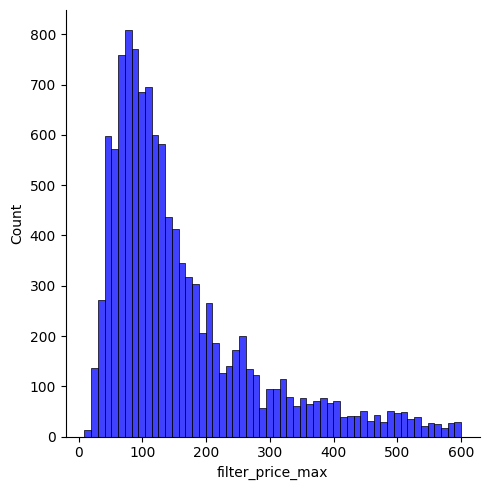

In [30]:
#Distribution of filter_price_max of searches

#Removing the set upper limit
searches_maxprice_removed = searches[searches['filter_price_max'] <= 600]

#Distribution plot of filter_price_max column
sns.displot(x=searches_maxprice_removed["filter_price_max"], color = 'blue')
plt.show()

Filter_price_max was chosen instead of filter_price_min due to the min usually being set at $0

To further help better visualize the trend we set the filter price max as less or equal to 600. 600 was chosen as the limit since only 14.25% of the dataset has values greater than 600

9.396423874415872 % 



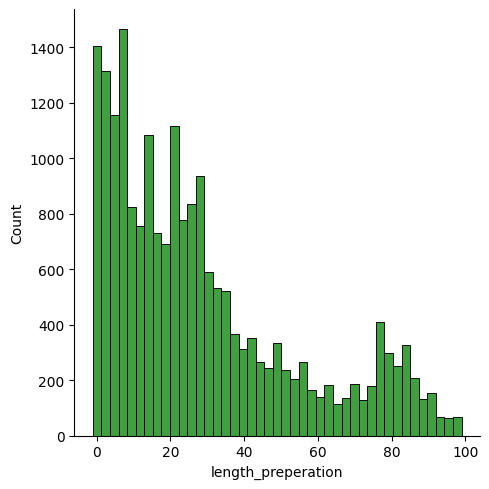

In [31]:
#Distribution of length_preperation of searches

#Percentage of dataset beyond 100 days
distribution = searches["length_preperation"] / np.timedelta64(1, 'D')
print(len(distribution[distribution > 100])/len(distribution)*100, '% \n')

#Remove values beyond 100 days
distribution = distribution[distribution < 100]

#Distribution plot of length_preperation column
sns.displot(x=distribution, color = 'green')
plt.show()

100 days was chosen as the limit since only 14.06% of the dataset exists beyond that



4.737387021854101 % 



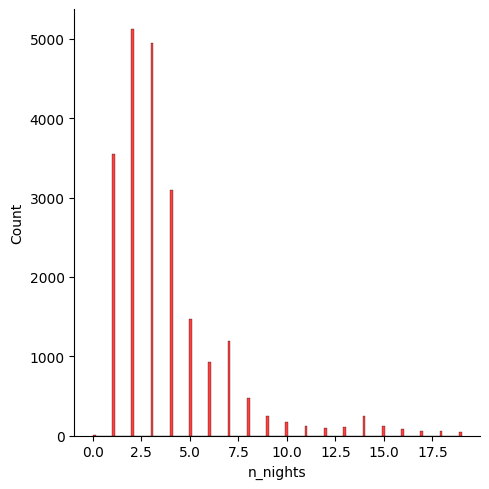

In [32]:
#Distribution of n_nights of searches

#Percentage of dataset beyond 20 nights
print(len(searches[searches['n_nights'] > 20])/len(searches['n_nights'])*100, '% \n')

#Remove n_nights beyond 20 days
searches_within_twenty = searches[searches['n_nights'] < 20]

#Distribution plot of length_preperation column
sns.displot(searches_within_twenty, x='n_nights', color = 'red')
plt.show()

Removing n_nights beyond 20 days since only 7.3% of the dataset exists beyond 20 days



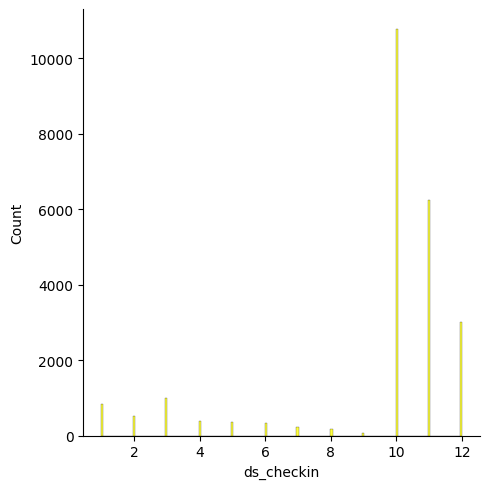

In [33]:
#Distribution of months of ds_checkin of searches

checkin_month = pd.DatetimeIndex(searches['ds_checkin']).month

#Distribution plot of length_preperation column
sns.displot(checkin_month, color = 'yellow')
plt.show()

Used only the check-in month, cause checkout is usually within 5/6 days. The mean of n_nights after removing the upper outlier limit is 5.6, so assumed 5 or 6 days after the check-in date people usually checkout

In [35]:
#Types of rooms searched for

searches['filter_room_types'].unique()[0:15] #Display first 15 unique values

array([',Entire home/apt,Entire home/apt,Private room,Private room', nan,
       ',Entire home/apt',
       'Entire home/apt,Entire home/apt,Private room,Private room',
       'Entire home/apt', ',Shared room,Private room',
       'Entire home/apt,Private room,Shared room,Private room,Shared room',
       'Private room', 'Entire home/apt,Private room', ',Private room',
       ',Entire home/apt,Private room',
       ',Entire home/apt,Private room,Private room',
       'Entire home/apt,Private room,Shared room',
       ',Entire home/apt,Entire home/apt,Private room',
       ',Entire home/apt,Entire home/apt,Shared room,Shared room'],
      dtype=object)

On the Airbnb website, there are only 4 values in the type of place:

Entire Place
Private Room
Hotel Room
Shared Room
So searching how often these 4 strings occur would be how I go about it

In [37]:
#Find top 15 countries where searches originate from

#Group by origin country and finding the count of each country
search_origin = searches.groupby("origin_country").agg({'origin_country' : 'count'})
#This line renames the column in the resulting DataFrame to 'count' for clarity.
search_origin.columns = ['count']

search_origin = search_origin.sort_values('count', ascending = False) #Sort count in descending order
search_origin.nlargest(15, 'count') #Find the 15 largest values

,count
origin_country,
IE,6608
US,5811
GB,4832
FR,3444
IT,2333
DE,2170
ES,1759
CA,1085
AU,962


contacts Dataset


In [39]:
#Manipulation of contacts dataset

#Convert date columns to datetime data type 
contacts['ts_contact_at'] = pd.to_datetime(contacts['ts_contact_at'])
contacts['ts_reply_at'] = pd.to_datetime(contacts['ts_reply_at'])
contacts['ts_accepted_at'] = pd.to_datetime(contacts['ts_accepted_at'])
contacts['ts_booking_at'] = pd.to_datetime(contacts['ts_booking_at'])
contacts['ds_checkin'] = pd.to_datetime(contacts['ds_checkin'])
contacts['ds_checkout'] = pd.to_datetime(contacts['ds_checkout'])
contacts['accepted'] = np.where(np.isnan(contacts['ts_accepted_at']), False, True)

contacts['length_stay'] = contacts['ds_checkout'] - contacts['ds_checkin']

#Understand dataset
display(contacts.dtypes)
display(contacts.describe())

id_guest                   object
id_host                    object
id_listing                 object
ts_contact_at      datetime64[ns]
ts_reply_at        datetime64[ns]
ts_accepted_at     datetime64[ns]
ts_booking_at      datetime64[ns]
ds_checkin         datetime64[ns]
ds_checkout        datetime64[ns]
n_guests                    int64
n_messages                  int64
accepted                     bool
length_stay       timedelta64[ns]
dtype: object

,n_guests,n_messages,length_stay
count,7823.000000,7823.000000,7823
mean,2.422600,6.319954,5 days 19:25:32.864629937
std,1.617347,6.472827,14 days 23:45:24.447710564
min,1.000000,1.000000,1 days 00:00:00
25%,1.000000,2.000000,2 days 00:00:00
50%,2.000000,4.000000,3 days 00:00:00
75%,3.000000,8.000000,5 days 00:00:00
max,16.000000,102.000000,334 days 00:00:00


In [41]:
#Calculate skewness in contacts dataset

display(contacts.skew(axis = 0, numeric_only = True, skipna = True))

n_guests      2.441468
n_messages    3.696440
accepted      0.145883
dtype: float64

All columns have a Fisher-Pearson coefficient value greater than 1. Except for accepted, which could be due to it being derived from an existing column.

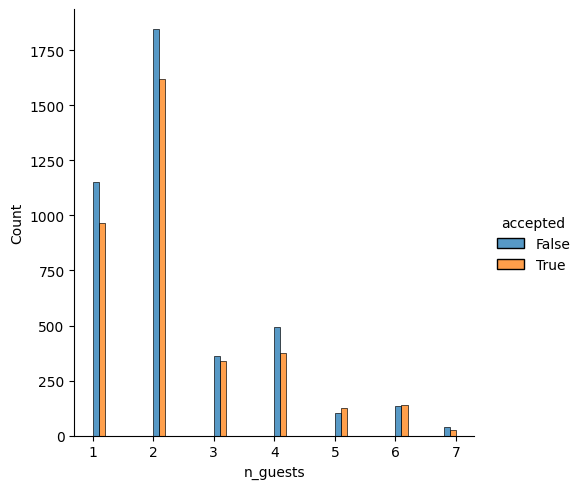

In [42]:
#Number of guests stayed

contacts_less8 = contacts[contacts['n_guests'] < 8]
sns.displot(contacts_less8, x = 'n_guests', hue = 'accepted', multiple="dodge")
plt.show()

Choosing less than 8 guests, since only 1.46% (114 values) of the contacts dataset has 8 or more guests. To better visualize the majority distribution we removed rows with 8 or more guests.

2 guests is the most popular option to book, but 1 guest is the most popularly searched option. This leads me to believe there is a lack of supply of viable single guest rooms.

In [43]:
#Conversion rate from accepting to booking

contacts['ts_booking_at'].count()/contacts['ts_accepted_at'].count()

0.5993934381031155

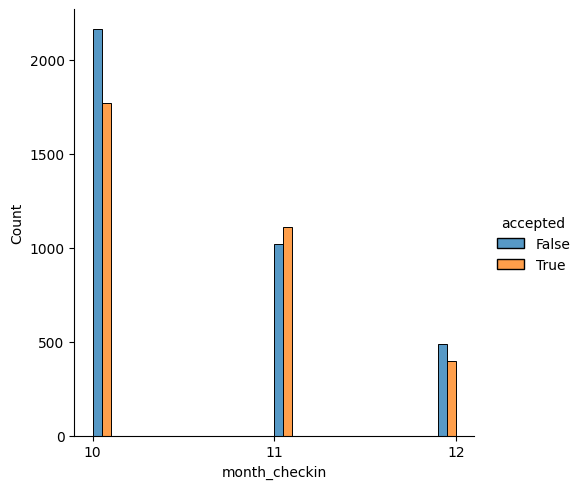

In [44]:
#Timeframe of when guests or accepted vs rejected

contacts['month_checkin'] = contacts['ds_checkin'].dt.month #Extract month from checkin date
contacts_checkin = contacts[contacts['month_checkin'] > 9] #Use only peak season months (Oct, Nov, Dec)

#Distribution of checkin among October, November, and December and split by acceptance
sns.displot(contacts_checkin, x='month_checkin', hue = 'accepted', multiple="dodge")
plt.xticks([10, 11, 12])
plt.show()

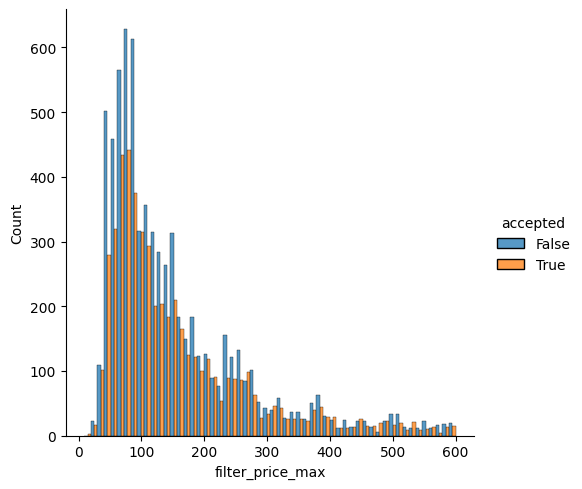

In [46]:
#Merge datasets for more analysis

merged_datasets = contacts.merge(searches, left_on='id_guest', right_on='id_user')
#Check difference between prices searched between accepted/rejected applicants

merged_pricemax_filter = merged_datasets.loc[(merged_datasets['filter_price_max'] <= 600)]

sns.displot(merged_pricemax_filter, x="filter_price_max", hue="accepted", multiple="dodge")
plt.show()

To further help better visualize the trend we set the filter price max as less or equal to 600. 600 was chosen as the limit since only 14.25% of the dataset has values greater than 600.

As seen, more people are rejected compared than accepted with an average acceptance rate of 43%

In [47]:
#Classify dataset based on filter_price_max

def label_price (row):
    if (row['filter_price_max'] >= 0) & (row['filter_price_max'] < 100):
        return '0-100'
    
    elif (row['filter_price_max'] >= 100) & (row['filter_price_max'] < 200):
        return '100-200'

    elif (row['filter_price_max'] >= 200) & (row['filter_price_max'] < 300):
        return '200-300'
    
    elif (row['filter_price_max'] >= 300) & (row['filter_price_max'] < 400):
        return '300-400'

    elif (row['filter_price_max'] >= 400) & (row['filter_price_max'] < 500):
        return '400-500'
    
    elif (row['filter_price_max'] >= 500) & (row['filter_price_max'] < 600):
        return '500-600'
    
    else:
        return '600+'

merged_datasets['classification_max_price'] = merged_datasets.apply(lambda row: label_price(row), axis=1)

merged_datasets.groupby('classification_max_price').agg({'accepted': 'mean'})

,accepted
classification_max_price,
0-100,0.411160
100-200,0.430308
200-300,0.431149
300-400,0.450488
400-500,0.485549
500-600,0.422297
600+,0.433122


In [48]:

dataset_country = merged_datasets[['origin_country', 'accepted']]

#Find acceptance count by country and accepted
accepted_count = dataset_country.groupby(['origin_country', 'accepted']).agg({'origin_country':'count'})
accepted_count.columns = ['count_accepted']

#Find acceptance count by country
country_count = dataset_country.groupby(['origin_country']).agg({'origin_country':'count'})
country_count.columns = ['count_country']

#Merge datasets for easier manipulation 
acceptance_country = pd.merge(dataset_country, accepted_count,  how='left', on=['origin_country','accepted']) #Merge accepted count
acceptance_country = acceptance_country.drop_duplicates()

acceptance_country = pd.merge(acceptance_country, country_count, how='left', on=['origin_country']) #Merge total country count
acceptance_country = acceptance_country.sort_values(['count_country', 'accepted'], ascending = [False, True])
acceptance_country = acceptance_country[acceptance_country['count_country'] >= 100] #100 is used so there is a good amount of data to make assumptions
acceptance_country = acceptance_country[acceptance_country['accepted'] == True]

#Divide count_accepted column by count_country column to find acceptance rate by country
acceptance_country['acceptance_rate'] = acceptance_country['count_accepted']/acceptance_country['count_country']
acceptance_country.sort_values(['acceptance_rate'], ascending = True)

,origin_country,accepted,count_accepted,count_country,acceptance_rate
73,IN,True,138,874,0.157895
55,HR,True,159,530,0.300000
72,AT,True,83,239,0.347280
54,RU,True,83,239,0.347280
11,IT,True,1183,3137,0.377112
100,AE,True,59,154,0.383117
0,CA,True,407,993,0.409869
13,IE,True,1217,2951,0.412403
24,ES,True,794,1914,0.414838
49,RO,True,50,118,0.423729
